In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.io
import math
import random

## Problem 1: Mendel’s Pea Plants

### 1.a)	Simulate any genetic mechanism to generate an expected result.

#### 1.a.i. Simulate a virtual pea plant that has one heterozygous trait crossed with another virtual pea plant with the same heterozygous genotype. Assuming the likelihoods of the offspring getting either allele are equal, confirm that on average we expect to observe a 1:2:1 ratio between the homozygous dominant, heterozygous, and homozygous recessive genotypes in the offspring.

In [2]:
Dom = 'A'
Rec = 'a'
Plant1 = [Dom,Rec]
Plant2 = [Dom,Rec]

Crosses = 10000
homo_dom = 0
hetero = 0
homo_rec = 0
for i in range(Crosses):
    cross = [random.choice(Plant1),random.choice(Plant2)]
    if cross.count(Dom) == 2:
        homo_dom += 1
    elif cross.count(Rec) == 2:
        homo_rec += 1
    else:
        hetero += 1

In [3]:
print(f"Offspring totals: AA: {homo_dom}, Aa: {hetero}, aa: {homo_rec}")
print(f"AA:Aa:aa -- {homo_dom/homo_dom:.2f}:{hetero/homo_dom:.2f}:{homo_rec/homo_dom:.2f}")

Offspring totals: AA: 2493, Aa: 5088, aa: 2419
AA:Aa:aa -- 1.00:2.04:0.97


#### 1.a.ii. Simulate the crossing between two virtual pea plants that have two traits and that are heterozygous for both. Assuming the alleles of the different traits are segregated independently (the Law of Independent Assortment holds), confirm that the offspring will have a phenotypic ratio of 9 Dom-Dom: 3 Dom-Rec: 3 Rec-Dom: 1 Rec-Rec in the two traits.

In [4]:
pea1 = ['AB','Ab','aB','ab']
pea2 = ['AB','Ab','aB','ab']

dom_dom = ['ABAB','ABAb','ABaB','ABab','AbAB','AbaB','aBAB','aBAb','abAB']
dom_rec = ['AbAb','Abab','abAb']
rec_dom = ['aBaB','aBab','abaB']

DD = 0
Dr = 0
rD = 0
rr = 0

for i in range(Crosses):
    cross = ''.join([random.choice(pea1),random.choice(pea2)])
    if cross in dom_dom:
        DD += 1
    elif cross in dom_rec:
        Dr += 1
    elif cross in rec_dom:
        rD += 1
    else:
        rr += 1

In [5]:
print(f"Offspring totals: Dom-Dom: {DD}, Dom-Rec: {Dr}, Rec-Dom: {rD}, Rec-Rec: {rr}")
print(f"Dom-Dom:Dom-Rec:Rec-Dom:Rec-Rec -- {DD/rr:.2f}:{Dr/rr:.2f}:{rD/rr:.2f}:{rr/rr:.2f}")

Offspring totals: Dom-Dom: 5607, Dom-Rec: 1901, Rec-Dom: 1839, Rec-Rec: 653
Dom-Dom:Dom-Rec:Rec-Dom:Rec-Rec -- 8.59:2.91:2.82:1.00


#### 1.a.iii. Write a function that simulates the crossing between two virtual pea plants with one trait. The input pea plants should be able to have arbitrary genotype, and should produce any desired number of offspring.

In [6]:
def cross_one_trait(gen1,gen2,crosses):
    """
    Cross two plants however many times! Provide gen1 and gen2, genotype of plant 1 and 2,
    respectively, as lists of str.
    offspring - int, number of offspring to generate.
    """
    offspring = []

    for i in range(crosses):
        offspring.append([random.choice(gen1),random.choice(gen2)])
        
    return offspring

In [7]:
out = cross_one_trait(Plant1,Plant2,Crosses)
len(out)

10000

### 1.b) 	For each of the 84 experiments calculate Edward’s $\chi$-statistic
### $\chi = \frac{Obs - Np}{\sqrt{Npq}}$  
### where p and q are the expected likelihood of allele 1 and allele 2, respectively.  Also, calculate the $\chi^2$-statistic using the formula
### $\chi^2 = \sum\limits_{i}\frac{(O_{i}-E_{i})^2}{E_{i}}$
### compare to the square of the $\chi$-statistic and explain why they are identical.

In [8]:
Edwards = pd.read_csv('EdwardsTable2.csv',delimiter=', ')
Edwards['prob1'] = (Edwards['Exp1']/(Edwards['Exp1']+Edwards['Exp2']))
Edwards['prob2'] = (Edwards['Exp2']/(Edwards['Exp1']+Edwards['Exp2']))
Edwards['$\chi$'] = (Edwards['Obs1'] - (Edwards['Total']*Edwards['prob1']))/np.sqrt(Edwards['Total']*Edwards['prob1']*Edwards['prob2'])
Edwards['Squared $\chi$'] = Edwards['$\chi$']**2
Edwards['$\chi^2$'] = (Edwards['Obs1'] - (Edwards['Total']*Edwards['prob1']))**2/(Edwards['Total']*Edwards['prob1']) + (Edwards['Obs2'] - (Edwards['Total']*Edwards['prob2']))**2/(Edwards['Total']*Edwards['prob2'])
Edwards

<ipython-input-8-82dec9ea13ab>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Edwards = pd.read_csv('EdwardsTable2.csv',delimiter=', ')


,Experiment,Character,Exp1,Exp2,Obs1,Obs2,Total,prob1,prob2,$\chi$,Squared $\chi$,$\chi^2$
0,1,A,3.0,1.0,5138,1749,6887,0.75,0.25,-0.758317,0.575045,0.575045
1,2,B,3.0,1.0,5667,1878,7545,0.75,0.25,0.219343,0.048111,0.048111
2,3,A,3.0,1.0,45,12,57,0.75,0.25,0.688247,0.473684,0.473684
3,4,A,3.0,1.0,27,8,35,0.75,0.25,0.292770,0.085714,0.085714
4,5,A,3.0,1.0,24,7,31,0.75,0.25,0.311086,0.096774,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,B among Aa,1.0,1.0,24,25,49,0.50,0.50,-0.142857,0.020408,0.020408
80,81,B among aa,1.0,1.0,22,27,49,0.50,0.50,-0.714286,0.510204,0.510204
81,82,G,1.0,1.0,87,79,166,0.50,0.50,0.620920,0.385542,0.385542
82,83,C among Gg,1.0,1.0,47,40,87,0.50,0.50,0.750479,0.563218,0.563218


If I assume a binomial distribution (essentially, a process which generates only two, mutually-exclusive outcomes), I can see how the second formula becomes the first. In essence, because of the binomial distribution assumption, the expected value ($E_{i}$) of a "successful" event would be $Np$, where $N$ would be the number of events and $p$ would be its likelihood of occurring. Conversely, the expected value (say, $E_{j}$) of the "failure" event would be $Nq$, in this case $q=1-p$ since there are only two, mutually exclusive outcomes in the outcome space for one event.  
  
  Now, let's do some math. I'll go from second formula to the first:  
  
For binomially-distributed random variables, $E_{s} = Np$ and $E_{f} = Nq$. Then,  
  
### $\chi^2 = \sum\limits_{i}\frac{(O_{i}-E_{i})^2}{E_{i}} = \frac{(O_{s}-E_{s})^2}{E_{s}} + \frac{(O_{f}-E_{f})^2}{E_{f}}= \frac{(O_{s}-Np)^2}{Np} + \frac{(O_{f}-Nq)^2}{Nq}$
### $\chi^2 = \frac{q(O_{s}-Np)^2 + p(O_{f}-Nq)^2}{Npq}$  

Another implication of this binomial distribution is that $O_{s}+O_{f}=N$. As such,  
### $\chi^2 = \frac{q(O_{s}-Np)^2 + p(N-O_{s}-Nq)^2}{Npq}= \frac{q(O_{s}-Np)^2 + p(-O_{s}+N-Nq)^2}{Npq}$
### $\chi^2 = \frac{q(O_{s}-Np)^2 + p(-O_{s}+N(1-q))^2}{Npq}= \frac{q(O_{s}-Np)^2 + p(-O_{s}+Np)^2}{Npq}$
### $\chi^2 = \frac{(O_{s}-Np)^2(q + p)}{Npq}= \frac{(O_{s}-Np)^2}{Npq}$
## $\chi = \frac{O_{s}-Np}{\sqrt{Npq}}$

### 1.c) Consider any one of the experiments enumerated by Edwards (look on page 306 of his paper for more details). Regardless of the details of the biology, Mendel’s laws allow us to make quantitative predictions of the phenotypic ratios of any particular trait. These expectations are given in the Exp1 and Exp2 columns. Using these expected ratios, simulate one of Mendel’s experiments many times (justify how many is “many”) using your code from part 1a or as a biased coin flip, and calculate the $\chi$ and $\chi^2$ statistics for each simulation. Plot a distribution of these statistics and plot a line showing where Mendel’s data for this experiment   fall on this distribution. Plot the cumulative distribution of these statistics and show where Mendel’s data fall. Report the empirical probability of observing a statistic larger than Mendel’s and the probability of observing a statistic smaller.

How many, given the computer at our disposal, would be a minimum of 10k. CLT would come into play here, but it would prescribe approximately 1000-2000 simulations, so 10k is safe from that point of view.

In [9]:
def get_cdfs(dist_data):
    """
    Returns the sorted unique value of dist_data, and a list of percentiles (after normalizing)
    """
    
    data_sorted = np.sort(dist_data)

    perc = np.arange(len(dist_data)) / (len(dist_data) - 1)
    
    return data_sorted,perc

In [10]:
N_sim = 10000
pDom = Edwards.loc[0,'prob1']
pRec = Edwards.loc[0,'prob2']
num_cross = Edwards.loc[0,'Total']
mendel_chi = Edwards.loc[0,'$\chi$']
mendel_chisquare = Edwards.loc[0,'$\chi^2$']
chi = []
chi_square = []

for i in range(N_sim):
    experiment = cross_one_trait(Plant1,Plant2,num_cross)
    rec = experiment.count([Rec,Rec])
    dom = num_cross - rec
    chi.append((dom - (num_cross*pDom))/math.sqrt(num_cross*pDom*pRec))
    temp = (dom - (num_cross*pDom))**2/(num_cross*pDom) + (rec - (num_cross*pRec))**2/(num_cross*pRec)
    chi_square.append(temp)
    
chi_CDF = get_cdfs(chi)
chi_square_CDF = get_cdfs(chi_square)

<IPython.core.display.Javascript object>


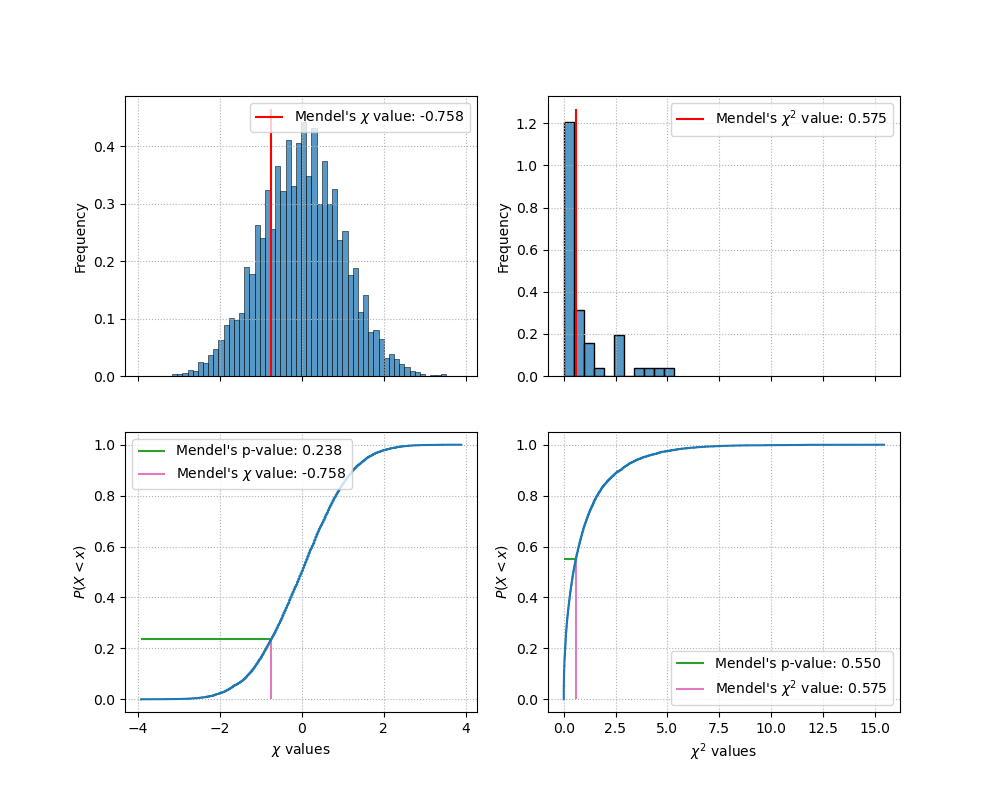

In [14]:
%matplotlib nbagg

fig,[[ax,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(10,8),sharex='col')
sns.histplot(chi,stat='density',ax=ax)
ax.set_ylabel('Frequency')
ax.set_xlabel('$\chi$ values')
ax.vlines(mendel_chi,0,ax.get_ylim()[-1],color='r',label=f"Mendel's $\chi$ value: {mendel_chi:.3f}")
ax.grid(linestyle=':')
ax.legend(loc='best')

sns.histplot(chi_square,stat='density',ax=ax1)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('$\chi^2$ values')
ax1.vlines(mendel_chisquare,0,ax1.get_ylim()[-1],color='r',label=f"Mendel's $\chi^2$ value: {mendel_chisquare:.3f}")
ax1.grid(linestyle=':')
ax1.legend(loc='best')

ax2.step(chi_CDF[0],chi_CDF[1])
ax2.set_xlabel('$\chi$ values')
ax2.set_ylabel('$P(X<x)$')
ax2.hlines(chi_CDF[1][chi_CDF[0] <= mendel_chi][-1],min(chi_CDF[0]),mendel_chi,color = 'C2',label=f"Mendel's p-value: {chi_CDF[1][chi_CDF[0] <= mendel_chi][-1]:.3f}")
ax2.vlines(mendel_chi,0,chi_CDF[1][chi_CDF[0] <= mendel_chi][-1],color='C6',label=f"Mendel's $\chi$ value: {mendel_chi:.3f}")
ax2.grid(linestyle=':')
ax2.legend(loc='best')

ax3.step(chi_square_CDF[0],chi_square_CDF[1])
ax3.set_xlabel('$\chi^2$ values')
ax3.set_ylabel('$P(X<x)$')
ax3.hlines(chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1],min(chi_square_CDF[0]),mendel_chisquare,color = 'C2',label=f"Mendel's p-value: {chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1]:.3f}")
ax3.vlines(mendel_chisquare,0,chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1],color = 'C6',label=f"Mendel's $\chi^2$ value: {mendel_chisquare:.3f}")
ax3.grid(linestyle=':')
ax3.legend(loc='best')
plt.show()

The p-values report the empirical probability of observing a statistic smaller than or equal than Mendel’s.  
And the probability of observing a statistic smaller:

In [12]:
print(f"For the bottom-left: {1-chi_CDF[1][chi_CDF[0] <= mendel_chi][-1]:.3f},"
      "For the bottom-right: {1-chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1]:.3f}")

For the bottom-left: 0.762,For the bottom-right: {1-chi_square_CDF[1][chi_square_CDF[0] <= mendel_chisquare][-1]:.3f}


### 1.d) Simulate all of Mendel’s experiments several times, calculate the $\chi^2$ statistic for each experiment in the simulation, and sum the $\chi^2$ values from all the experiments in a given simulation. Simulate these experiments as biased coin tosses or using an appropriate binomial distribution (your code from problem 1a will likely be too slow), as suggested in the previous problem. Sum the $\chi^2$ statistics from Mendel’s data. Plot the distribution and cumulative distribution of $\chi_{84}^2=\sum\limits_{i=1}^{84}\chi^2$ and show where Mendel data lie. Report the empirical probability of observing $\chi_{84}^2$ larger than Mendel’s and the probability of observing a statistic smaller. Make a statement assessing the confidence we have in the null hypothesis given these probabilities (This is the process Fisher used to justify his suspicion of Mendel’s results, although he arrived at this number theoretically, rather than empirically).

In [15]:
total_chi_square = []
total_mendel_chisquare = 0

for i in range(N_sim):
    chi_square = []
    
    for j in range(len(Edwards)):
        pDom = Edwards.loc[j,'prob1']
        pRec = Edwards.loc[j,'prob2']
        num_cross = Edwards.loc[j,'Total']
        if i==0:
            total_mendel_chisquare += Edwards.loc[j,'$\chi^2$']

        dom = np.sum(np.random.rand(num_cross) <= pDom)
        rec = num_cross - dom
        temp = (dom - (num_cross*pDom))**2/(num_cross*pDom) + (rec - (num_cross*pRec))**2/(num_cross*pRec)
        chi_square.append(temp)
        
    total_chi_square.append(np.sum(chi_square))

In [16]:
CDF_totalchi = get_cdfs(total_chi_square)

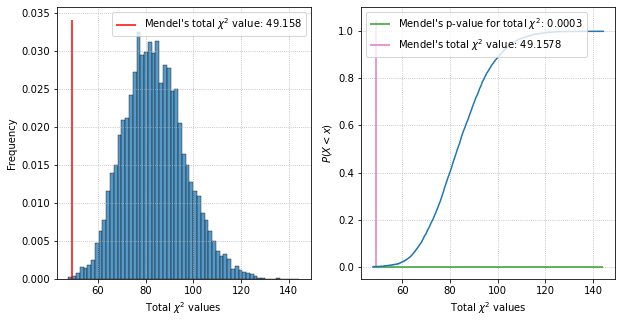

In [17]:
%matplotlib inline

fig1,[ax4,ax5] = plt.subplots(1,2,figsize=(10,5))
sns.histplot(total_chi_square,stat='density',ax=ax4)
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Total $\chi^2$ values')
ax4.vlines(total_mendel_chisquare,0,ax4.get_ylim()[-1],color='r',label=f"Mendel's total $\chi^2$ value: {total_mendel_chisquare:.3f}")
ax4.grid(linestyle=':')
ax4.legend(loc='best')

ax5.step(CDF_totalchi[0],CDF_totalchi[1])
ax5.set_xlabel('Total $\chi^2$ values')
ax5.set_ylabel('$P(X<x)$')
ax5.hlines(CDF_totalchi[1][CDF_totalchi[0] <= total_mendel_chisquare][-1],min(CDF_totalchi[0]),max(CDF_totalchi[0]),color = 'C2',label=f"Mendel's p-value for total $\chi^2$: {CDF_totalchi[1][CDF_totalchi[0] <= total_mendel_chisquare][-1]:.4f}")
ax5.vlines(total_mendel_chisquare,0,ax5.get_ylim()[-1],color='C6',label=f"Mendel's total $\chi^2$ value: {total_mendel_chisquare:.4f}")
ax5.grid(linestyle=':')
ax5.legend(loc='best')
plt.show()

In [18]:
print(f"Likelihood of observing a total Chi-square value greater than Mendel's total Chi-square: {1-CDF_totalchi[1][CDF_totalchi[0] <= total_mendel_chisquare][-1]:.4f}\nAND less than or equal to Mendel's total Chi-square: {CDF_totalchi[1][CDF_totalchi[0] <= total_mendel_chisquare][-1]:.4f}")

Likelihood of observing a total Chi-square value greater than Mendel's total Chi-square: 0.9997
AND less than or equal to Mendel's total Chi-square: 0.0003


This result poses a challenge. The simulation used the expected phenotypic ratios for each experiment (from Mendel's own proposed laws explaining his results) to simulate each of them once. Then, the $\chi^2$ values (quantifying deviations from expected ratio) of each simulated experiment were added up. This process was repeated 10k times, yielding a distribution of total $\chi^2$ values (total deviations from expectation from all experiments). This distribution shows that under the assumed random process at play, and expected probability/ratio parameters, the distribution of total $\chi^2$ is centered at around $80-85$. It means that the expected total deviation from expected ratios is centered around $80-85$ (very close to the degrees of freedom). This distribution would then be the null distribution, as we would use it to test if Mendel's total $\chi^2$ value is likely to happen under this distribution.  
  
  But if I were to use even the stricter significance cutoff of $p<1\%$, I could reject the hypothesis that Mendel's total $\chi^2$ value could be sampled from the simulated total $\chi^2$ distribution ($p=0.07\%$, after first run of the code).  
    
   The challenging bit is that, if all of Mendel's experiments were indeed a random sampling of binomial processes, the distribution of the total $\chi^2$ should easily contain Mendel's total $\chi^2$. While it actually does contain it, hypothesis-testing suggests it is unlikely to come from that distribution ($p=0.07\%$, after first run of the code). Put it another way, Mendel's total $\chi^2$ is very far away to the left from what would be expected if the random process he sampled indeed follows his laws (i.e. the overall experiments deviate way less than expected for the assumed process). 
     
   Given how Mendel's laws, while not completely accurate, have been reasonbly shown to be correct, Fisher's interpretation of data cooking seems plausible under this scenario.

### 1.e) Consider the 69 experiments that do not involve an expected ratio of 0.6291:0.3709. Simulate each experiment 100 times using the expected ratios and calculate the Edwards $\chi$ values for each simulation (so that you have 6900 $\chi$ values). Plot their distribution and plot the distribution of $\chi$ values from the data.

In [19]:
Edwards_clean = Edwards[Edwards['Exp2']!=0.3709]
chi_clean_mendel = Edwards_clean['$\chi$']

N_sim2 = 100
i = 0
chi_clean = []

In [20]:
for i in range(N_sim2):
    
    for j in Edwards_clean.index:
        pDom = Edwards_clean.loc[j,'prob1']
        pRec = Edwards_clean.loc[j,'prob2']
        num_cross = Edwards_clean.loc[j,'Total']
        dom = np.sum(np.random.rand(num_cross) <= pDom)
        rec = num_cross - dom
        chi_clean.append((dom - (num_cross*pDom))/math.sqrt(num_cross*pDom*pRec))

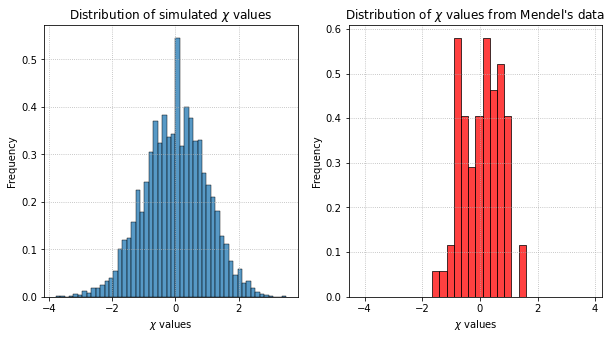

In [21]:
fig2,[ax6,ax7] = plt.subplots(1,2,figsize=(10,5))
sns.histplot(chi_clean,stat='density',ax=ax6)
ax6.set_ylabel('Frequency')
ax6.set_xlabel('$\chi$ values')
ax6.set_title('Distribution of simulated $\chi$ values')
ax6.grid(linestyle=':')

sns.histplot(chi_clean_mendel,stat='density',ax=ax7,bins=np.arange(ax6.get_xlim()[0],ax6.get_xlim()[-1],0.25),color='r')
ax7.set_xlabel('$\chi$ values')
ax7.set_ylabel('Frequency')
ax7.set_title("Distribution of $\chi$ values from Mendel's data")
ax7.grid(linestyle=':')
plt.show()

Decided to make sure the x-axis for both plots are the same... We seem to have cut out tails... Incriminating evidence...

### 1.f) Plot the empirical cumulative density function for the simulated and measured $\chi$ values. Discuss how the differences between these curves suggest that Mendel curated his data to conform to his expectations. This figure should be similar to Figures 1 and 2 in Edwards’ paper.

In [22]:
CDF_chicleanmendel = get_cdfs(chi_clean_mendel)
CDF_chiclean = get_cdfs(chi_clean)

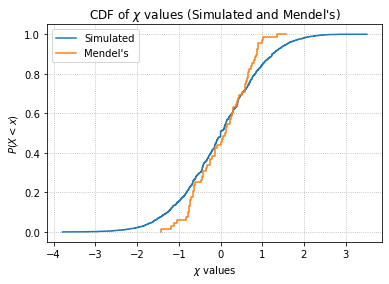

In [23]:
fig3,ax8 = plt.subplots(1,1)
ax8.step(CDF_chiclean[0],CDF_chiclean[1],label='Simulated')
ax8.step(CDF_chicleanmendel[0],CDF_chicleanmendel[1],label="Mendel's")
ax8.set_xlabel('$\chi$ values')
ax8.set_ylabel('$P(X<x)$')
ax8.set_title("CDF of $\chi$ values (Simulated and Mendel's)")
ax8.grid(linestyle=':')
ax8.legend(loc='best')
plt.show()

The fact the tails are cut out is quite strong evidence that there was systematic cooking of the data. Deviations beyond what he would perceive as a "threshold" simply don't appear in Mendel's data. Importantly, in doing the simulations assuming his laws are correct, I am getting a CDF with tails, meaning that a natural process following his laws should yield some of these rare instances of extreme values. Perhaps he was blind to the random nature of what he was studying, or too quick to judge an experimental run as a bad one just because of the result (assuming contamination without checking, for example).

### 1.g) Using the empirical CDFs from the previous problem, assess the likelihood that the simulated and data distributions are statistically equivalent using the K.S. statistic, the A.D. statistic, and the R.O.C. method.

Kolmogorov-Smirnov (K.S.) test

In [24]:
KS,p_valKS = stats.ks_2samp(chi_clean,chi_clean_mendel)
print(f"KS stat: {KS:.4f}, p-value: {p_valKS:.4f}")

KS stat: 0.1383, p-value: 0.1337


Anderson-Darling (A.D.) test

In [25]:
AD,critvalue_AD,p_valAD = stats.anderson_ksamp([chi_clean,chi_clean_mendel])
print(f"AD stat: {AD:.4f}, p-value: {p_valAD:.4f}\nCritical values for AD stat at 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%:")
print(critvalue_AD)

AD stat: 1.5417, p-value: 0.0751
Critical values for AD stat at 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%:
[0.325 1.226 1.961 2.718 3.752 4.592 6.546]


Receiver Operator Characteristic (R.O.C)

In [26]:
def common_grid(eCDFl,eCDFr):
    df_l = pd.DataFrame({'Values': list(eCDFl[0]), 'Percentiles': list(eCDFl[1])})
    df_r = pd.DataFrame({'Values': list(eCDFr[0]), 'Percentiles': list(eCDFr[1])})
    joined = pd.merge_ordered(df_l,df_r,on='Values',how='outer')
    left = list(joined['Percentiles_x'])
    right = list(joined['Percentiles_y'])

    for i in range(len(left)):
        if math.isnan(left[i]) and i == 0:
            left[i] = 0.0
        elif math.isnan(right[i]) and i == 0:
            right[i] = 0.0
        elif math.isnan(left[i]):
            left[i] = left[i-1]
        elif math.isnan(right[i]):
            right[i] = right[i-1]
            
    joined['left'] = left
    joined['right'] = right
    
    return joined[['Values','left','right']]

In [27]:
straightened = common_grid(CDF_chicleanmendel,CDF_chiclean)
straightened

,Values,left,right
0,-3.790451,0.0,0.000000
1,-3.587295,0.0,0.000145
2,-3.329974,0.0,0.000290
3,-3.290679,0.0,0.000435
4,-3.224157,0.0,0.000580
...,...,...,...
6912,2.812720,1.0,0.999420
6913,2.860388,1.0,0.999565
6914,2.894704,1.0,0.999710
6915,3.051080,1.0,0.999855


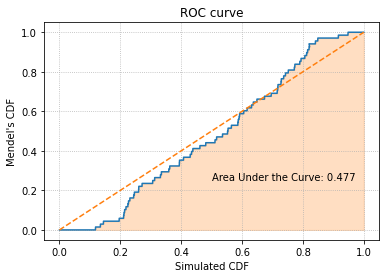

In [28]:
fig4,ax9 = plt.subplots(1,1)
ax9.plot(straightened['right'],straightened['left'])
ax9.plot([0,1],[0,1],'--')
ax9.fill_between(straightened['right'],straightened['left'],color='C1', alpha=0.25)
ax9.text(0.5, 0.25,f"Area Under the Curve: {np.trapz(straightened['left'],x=straightened['right']):.3f}")
ax9.set_xlabel('Simulated CDF')
ax9.set_ylabel("Mendel's CDF")
ax9.set_title("ROC curve")
ax9.grid(linestyle=':')
plt.show()

The three measures point to an inability to separate out the two distributions, making it seem they are similar. However, it is graphically clear that the main difference between the two distributions lies in the tails.  
As such, it seems the ROC captures this by how the curve looks at the lower left, and upper right (below, and then above the y=x line).  
It also looks like the AD test detected that difference given its slightly more confident measure of dissimularity.

### 1.h) One of the most notable points in Mendel’s original paper is that at one point an experiment yielded 60 heterozygous plants for pod color and 40 were homozygous green, when an expected ratio was 2:1. This departure from expectation was so large that Mendel repeated this experiment recording 65:35 in the subsequent trial. This was the only experiment that Mendel felt compelled to repeat (and report), but should he have been concerned? Use simulation (and theory if you want), to estimate how often one would expect to see such a deviation from expectation. Let’s assume Mendel was a more modern scientist and was willing to accept any data that had at least a 5% likelihood of being generated by the null hypothesis, what is the maximum deviation Mendel should allow before repeating his experiment?

In [29]:
min(dom)

TypeError: 'numpy.int32' object is not iterable

In [ ]:
pDom = 2/3
dom = []
for i in range(10000):
    dom.append(np.sum(np.random.rand(N_sim2) <= pDom))    

prob_60_or_less = (dom.count(60)+dom.count(59)+dom.count(58)+dom.count(57)+dom.count(56)+dom.count(55)+dom.count(54)+dom.count(53)+dom.count(52)+dom.count(51)+dom.count(50)+dom.count(49))/len(dom)
print(f"From simulation, I would expect to see 60 heterozygous plants {prob_60_or_less*100:.2f}% of the time.\n")

exp = round(100*(2/3))
devs = np.arange(-20,20,1)
deviation = []
for dev in devs:
    prob_hold = 0
    for i in range(len(devs)):
        prob_hold += dom.count(exp+dev-i)
        
    p = prob_hold/len(dom)
    if p >= 0.025 and p <= 0.975:
        deviation.append(dev)
        print(f"p({exp+dev})={p*100:.2f}%")

        
print(f"\nMaximum deviation on the negative side: {deviation[0]}\nMaximum deviation on the positive side: {deviation[-1]}")

## Problem 2: Chemotaxis Poisson Rate Parameters

### 2.a) Use bootstrapping of the first 100 intervals (use either $\tau^+$ or $\tau^-$) and the subsequent 100 intervals to make distributions of $\hat{\lambda} = \frac{1}{\bar{\tau}}$. Show these distributions with a relevant figure and annotate any relevant features.

In [ ]:
with open('omega.txt','r') as myFile:
    data = myFile.readlines()

clean_data = []
for item in data:
    item.strip("\n")
    clean_data.append(float(item))
    
positive_time_lengths = []
negative_time_lengths = []
count_pos = 0
count_neg = 0

# Setting the positive state as False since data starts in the negative angular velocity
positive = False

for item in clean_data:
    if positive:
        if item >= 0:        # Switching to using zero as the problem is explicit in asking for velocities
            count_pos += 1
        else:
            positive_time_lengths.append(count_pos/60)   # Asking for "Time intervals"
            count_pos = 0
            positive = False
            count_neg += 1
            
    if not positive:
        if item < 0:
            count_neg += 1
        else:
            negative_time_lengths.append(count_neg/60)
            count_neg = 0
            positive = True
            count_pos += 1

In [ ]:
first_100 = negative_time_lengths[0:99]
second_100 = negative_time_lengths[100:199]

N_boot = 50000
boot_first_100 = np.random.choice(first_100,replace=True,size=(N_boot,100))
boot_second_100 = np.random.choice(second_100,replace=True,size=(N_boot,100))

lambda_first_100 = 1/np.mean(boot_first_100, axis=1)
lambda_second_100 = 1/np.mean(boot_second_100, axis=1)

In [ ]:
fig5,ax10 = plt.subplots(1,1)
ax10 = sns.histplot(lambda_first_100,stat='density',alpha=0.35,label='0-100')
ax10 = sns.histplot(lambda_second_100,stat='density',color='r',alpha=0.35,label='100-200')
ax10.set_xlabel("$\lambda$")
ax10.set_ylabel("Frequency")
ax10.vlines(np.median(lambda_first_100),0,ax10.get_ylim()[-1],label=f"First 100 median: {np.median(lambda_first_100):.3f}")
ax10.vlines(np.median(lambda_second_100),0,ax10.get_ylim()[-1],color='r',label=f"Second 100 median: {np.median(lambda_second_100):.3f}")
ax10.legend(loc='best')
ax10.grid(linestyle=':')
plt.show()

### 2.b) Using these bootstrapped distributions, calculate $P(\lambda_{0-100} ≤ \lambda_{100−200})$, the K-S and A-D statistics, and an ROC curve to test the hypothesis that the rate changes over the course of the experiment. Assess the likelihood that the first 100 intervals have a statistically different rate parameter from the second 100 intervals.

$P(\lambda_{0-100} ≤ \lambda_{100−200})$

In [ ]:
print(f"Fraction of times the second-100 lambdas are greater than the first-100 lambdas: {np.sum(lambda_first_100 <= lambda_second_100)/N_boot}")

Kolmogorov-Smirnov (K.S.) test

In [ ]:
KS2,p_valKS2 = stats.ks_2samp(lambda_first_100,lambda_second_100)
print(f"KS stat: {KS2:.4f}, p-value: {p_valKS2}")

Anderson-Darling (A.D.) test

In [ ]:
AD2,critvalue_AD2,p_valAD2 = stats.anderson_ksamp([lambda_first_100,lambda_second_100])
print(f"AD stat: {AD2}, p-value: {p_valAD2},\nCritical values for AD stat at 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%:")
print(critvalue_AD2)

Receiver Operator Characteristic (R.O.C)

In [ ]:
CDF_lambdafirst = get_cdfs(lambda_first_100)
CDF_lambdasecond = get_cdfs(lambda_second_100)
straightened2 = common_grid(CDF_lambdafirst,CDF_lambdasecond)

In [ ]:
fig6,ax11 = plt.subplots(1,1)
ax11.plot(straightened2['left'],straightened2['right'])
ax11.plot([0,1],[0,1],'--')
ax11.fill_between(straightened2['left'],straightened2['right'],color='C1', alpha=0.25)
ax11.text(0.5, 0.25,f"Area Under the Curve: {np.trapz(straightened2['right'],x=straightened2['left']):.3f}")
ax11.set_xlabel('$\lambda_{0-100}$ CDF')
ax11.set_ylabel('$\lambda_{100-200}$ CDF')
ax11.set_title("ROC curve")
ax11.grid(linestyle=':')
plt.show()

The three measures point to a statistically significant difference in the distributions of rate parameters.

### 2.c) For any of the metrics in the previous problem, generate a null distribution empirically to test the likelihood that the first 100 intervals have a statistically different rate parameter from the second 100 intervals. (You cannot simply report the p-value from a previously coded implementation of any of these metrics.) Illustrate this result with a relevant figure and annotate any relevant features.

In [ ]:
KS_list = []

for i in range(10000):
    N_boot2 = 10000
    second100_sample1 = np.random.choice(second_100,replace=True,size=(N_boot2,100))
    second100_sample2 = np.random.choice(second_100,replace=True,size=(N_boot2,100))
    lambda1 = 1/np.mean(second100_sample1, axis=1)
    lambda2 = 1/np.mean(second100_sample2, axis=1)
    stat,pvalue = stats.ks_2samp(lambda1,lambda2)
    KS_list.append(stat)

In [ ]:
fig7,ax12 = plt.subplots(1,1)
ax12 = sns.histplot(KS_list,stat='density')
ax12.vlines(KS2,0,ax12.get_ylim()[-1],color='r',label=f"KS stat, 0-100/100-200: {KS2:.3f}")
ax12.set_xlabel('KS statistic')
ax12.set_ylabel('Frequency')
ax12.set_title('Null distribution of KS statistic')
ax12.grid(linestyle=':')
ax12.legend(loc='best')
plt.show()

There's no getting lost here, or need to estimate a p-value. The KS statistic is far to the right from the null distribution, making it borderline impossible to observe that KS statistic if the null hypothesis were true.

### 2.d) Break the list of time intervals (either the positive or negative list) into ∼20 equally sized sets of consecutive intervals (the intervals should be sequential in time). Make an estimate of the rate parameter, $\lambda$, in each set of intervals. Use OLS linear regression to fit a line to these estimates as a function of the time elapsed in the experiment (the beginning of the data is t = 0 and the end is t ≈ 5983 seconds). Assess the likelihood that there is a linear relationship between the rate parameter and time by simulating appropriate null distributions for the regression coefficients and comparing your observations to the null. Illustrate this relationship with an appropriate figure and discuss your results.

In [ ]:
pre = np.linspace(0,len(negative_time_lengths),num=21)
time = np.linspace(0,5983,num=20)
lambda_list = []
CI_upper = []
CI_lower = []
for i in range(len(pre)-1):
    temp = negative_time_lengths[int(pre[i]):int(pre[i+1])]
    boot_temp = np.random.choice(temp,replace=True,size=(N_boot,len(temp)))
    boot_lambdas = 1/np.mean(boot_temp, axis=1)
    CI = np.percentile(boot_lambdas, [100*0.05/2, 100*(1-0.05/2)])
    CI_upper.append(CI[-1]-(1/np.mean(temp)))
    CI_lower.append((1/np.mean(temp)) - CI[0])
    lambda_list.append(1/np.mean(temp))

In [ ]:
slope,intercept = np.polyfit(time,lambda_list,deg=1)

In [ ]:
fig8,ax13 = plt.subplots(1,1)
ax13 = sns.regplot(x=time,y=lambda_list,n_boot=N_boot2,robust=True,label="Fitted line with 95% CI band")
ax13.errorbar(time,lambda_list,yerr=(CI_lower,CI_upper),marker='o',ls='',capsize=2,label='$\lambda$ with 95% confidence interval')
ax13.set_xlabel('Time (sec)')
ax13.set_ylabel('Negative $\lambda$ value')
ax13.set_title('Rate parameter vs. time elapsed')
ax13.grid(linestyle=':')
ax13.legend(loc='best')
plt.show()

In [ ]:
slopes = []
intercepts = []

res_time = np.random.choice(time,size=(N_boot,len(time)),replace=True)
res_lambdas = np.random.choice(lambda_list,size=(N_boot,len(lambda_list)),replace=True)

for i in range(N_boot):
    hold1,hold2 = np.polyfit(res_time[i],res_lambdas[i],deg=1)
    slopes.append(hold1)
    intercepts.append(hold2)

In [ ]:
fig9,ax15 = plt.subplots(1,1)
sns.histplot(slopes,stat='density',ax=ax15)
# ax15.set_xlabel("Slope ($\beta_{1}$)")
# ax15.set_ylabel("Probability")
ax15.vlines(slope,0,ax15.get_ylim()[-1],color='r',label=f"Estimated slope: {slope:.9f}")
ax15.grid(linestyle=':')
ax15.legend(loc='best')
plt.show()

In [ ]:
fig10,ax16 = plt.subplots(1,1)
sns.histplot(intercepts,stat='density',ax=ax16)
# ax16.set_xlabel("y-intercept ($\beta_{0}$)")
# ax16.set_ylabel("Probability")
ax16.vlines(intercept,0,ax16.get_ylim()[-1],color='r',label=f"Estimated y-intercept: {intercept:.9f}")
ax16.grid(linestyle=':')
ax16.legend(loc='best')
plt.show()

### 2.e) Use the scipy.stats.kstest function to assess the likelihood that the time intervals, $\tau^+$ and $\tau^-$, are exponentially distributed. Use the scipy.stats.ks_2samp function to assess the likelihood that the two sets of intervals have the same parent distribution.

In [ ]:
positive_test = stats.kstest(positive_time_lengths,stats.expon.cdf)
print(f"Are the positive time intervals exponentially distributed?: KS stat: {positive_test[0]:.3f}, p-value: {positive_test[1]:.3f}")

negative_test = stats.kstest(negative_time_lengths,stats.expon.cdf)
print(f"Are the negative time intervals exponentially distributed?: KS stat: {negative_test[0]:.3f}, p-value: {negative_test[1]:.3f}")

In [ ]:
stats.kstest(stats.expon.rvs(loc= 3,size=1000),stats.expon.cdf)

In [ ]:
print("Are both time intervals coming from the same parent distribution?")
testing = stats.ks_2samp(positive_time_lengths,negative_time_lengths)
print(f"KS stat: {testing[0]:.3f}, p-value: {testing[1]}")

## Problem 3: The Luria-Delbrück Experiment

### 3.a) As part of the theoretical justification for their work, Luria and Delbrück showed that the variance in the number of resistant bacteria under the random mutation hypothesis grows exponentially with the number of generations. You can look at their work in their paper, or in the course notes, but along the way they also note that the mutation rate itself can be directly estimated from the data using the formula

### $a ≈ -ln⁡2 \frac{ln(\frac{N_{NoMut}}{N_{Plates}})}{N_{bact}}$ 

### where $a$ is the mutation rate, $N_{NoMut}$ is the number of plates with no mutations, $N_{Plates}$ is the number of cultures, and $N_{bact}$ is the number of bacteria on each culture.
### Consider the data from Luria and Delbrück’s Experiments 22 and 23.  How well can you recover their reported mutation rates? (The data has been stored as a MATLAB .mat file, so you will need to use the scipy.io.loadmat function! To parse the structure of the data, consult the original paper).

In [ ]:
LD_data = scipy.io.loadmat('LD_Data.mat')

LD1 = LD_data['LD1']
LD2 = LD_data['LD2']

N_nomut1 = LD1[0][1]
N_nomut2 = LD2[0][1]
N_plate1 = 0
N_plate2 = 0
N_bact1 = 280000000*0.25  # From paper
N_bact2 = 240000000

for i in range(len(LD1)):
    N_plate1 += LD1[i][1]
    N_plate2 += LD2[i][1]
    
mutRate1 = -math.log(2)*(math.log(N_nomut1/N_plate1)/N_bact1)
mutRate2 = -math.log(2)*(math.log(N_nomut2/N_plate2)/N_bact2)

print(f"Estimated mutation rate for experiment 22: {mutRate1}\nEstimated mutation rate for experiment 23: {mutRate2}")

In [ ]:
LD_data

I seem to underestimate those values by one order of magnitude.

### 3.b) Simulate 100 bacteria dividing over several generations, keeping track of whether a bacterium has mutated or not. Assume that bacteria mutate at a rate of $a = 5 × 10^{-5}$ every cell division. Perform this simulation many times and plot the distribution of the number of mutated cells. Calculate the expected value and the 5th, 25th, 50th, 75th, and 90th percentiles of the number of mutated bacteria.

### 3.c) Simulate the adaptive mutation hypothesis many times and plot the distribution of the number of mutated cells. Calculate the expected value and the 5th, 25th, 50th, 75th, and 90th percentiles of the number of mutated bacteria.

### 3.d) Simulate a single set of Luria and Delbrück’s experiments many times under each of the two hypotheses. For each “experiment”, calculate the Fano factor: $F=\frac{Var}{Mean}$ for the number of resistant bacteria as well as the mean number of mutated bacteria.

### 3.e) Estimate the likelihood that the mean number of mutated bacteria is different. Justify your approach. In particular, precisely describe your hypotheses, your statistic(s), and your null distributions. Assess how your estimation depends on the number of experiments and the number of plates in an experiment.

### 3.f) Estimate the probability of observing a Fano factor larger or smaller than those from the data. Interpret this finding in the context of the biology. Discuss why this test is more or less powerful than the previous problem for distinguishing between the models of bacterial mutation.